In [1]:
# 1. INSTALACIÓN Y LIBRERÍAS
!pip install numpy==1.23.5
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
  Using cached h2o-3.46.0.7-py2.py3-none-any.whl.metadata (2.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 3.8 MB/s eta 0:00:00


In [3]:
# 2. Montar Google Drive y cargar el dataset limpio

# Montar Google Drive para acceder al dataset
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Cargar dataset limpio y ya preprocesado
ruta = '/content/drive/MyDrive/Prediccion de Diabetes - Proyecto Analitica/proyecto-diabetes-analitica/Datos/dataset_limpio.csv'
df = pd.read_csv(ruta)

# Mostrar primeras filas
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,True,False,False,False,False


In [5]:
# 3. Separar variables predictoras y variable objetivo

# Separar variables predictoras (X) y la variable objetivo (y)
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 4. Entrenamiento con H2O AutoML

# Iniciar entorno de H2O
h2o.init()

# Convertir DataFrame de pandas a H2OFrame
df_h2o = h2o.H2OFrame(df)
df_h2o['diabetes'] = df_h2o['diabetes'].asfactor()  # H2O requiere variable objetivo categórica

# Lista de columnas predictoras
X_h2o = [col for col in df.columns if col != 'diabetes']

# Dividir en entrenamiento y prueba (80-20)
train, test = df_h2o.split_frame(ratios=[0.8], seed=42)

# Ejecutar H2O AutoML por 5 minutos
aml = H2OAutoML(max_runtime_secs=300, seed=42, balance_classes=True)
aml.train(x=X_h2o, y='diabetes', training_frame=train)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.27" 2025-04-15; OpenJDK Runtime Environment (build 11.0.27+6-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.27+6-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmps2veheu3
  JVM stdout: /tmp/tmps2veheu3/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmps2veheu3/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 12 days
H2O_cluster_name:,H2O_from_python_unknownUser_5seopv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/3
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
Custom metalearner hyperparameters,None


In [7]:
# 5. Resultados de H2O AutoML

# Mostrar los mejores modelos (leaderboard)
print("📊 Leaderboard H2O:")
print(aml.leaderboard.head())

# Evaluar el modelo líder en el conjunto de prueba
print("\n📈 Desempeño del mejor modelo (H2O):")
print(aml.leader.model_performance(test))

# Evaluar un modelo específico del leaderboard
mejor_modelo_automl = h2o.get_model('StackedEnsemble_BestOfFamily_1_AutoML_1_20250605_14748')
desempeno = mejor_modelo_automl.model_performance(test)
print("\n📈 Desempeño del modelo StackedEnsemble_BestOfFamily:")
print(desempeno)


📊 Leaderboard H2O:
model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20250608_231039  0.976337  0.0869155  0.87599                 0.162238  0.155541  0.024193
StackedEnsemble_BestOfFamily_2_AutoML_1_20250608_231039  0.975998  0.0872175  0.874744                0.160182  0.155481  0.0241743
GBM_1_AutoML_1_20250608_231039                           0.974743  0.141663   0.873281                0.141022  0.208164  0.0433322
XGBoost_1_AutoML_1_20250608_231039                       0.974004  0.141759   0.867271                0.162963  0.214295  0.0459222
GBM_4_AutoML_1_20250608_231039                           0.965553  0.267599   0.831125                0.160606  0.272785  0.0744114
GLM_1_AutoML_1_20250608_231039                           0.961708  0.114243   0.817248                0.177237  0.179009  0.032044
GBM_2_AutoML_1_20250608_231039                           0.

H2OResponseError: Server error water.exceptions.H2OKeyNotFoundArgumentException:
  Error: Object 'StackedEnsemble_BestOfFamily_1_AutoML_1_20250605_14748' not found for argument: key
  Request: GET /3/Models/StackedEnsemble_BestOfFamily_1_AutoML_1_20250605_14748


In [ ]:
# 6. Entrenamiento y evaluación de modelos clásicos (scikit-learn)

# Definir modelos clásicos
modelos = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

# Evaluar modelos
resultados = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados[nombre] = acc
    print(f"\n🔹 Modelo: {nombre}")
    print("Accuracy:", acc)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



🔹 Modelo: Logistic Regression
Accuracy: 0.95905
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.86      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000


🔹 Modelo: Decision Tree
Accuracy: 0.95275
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.72      0.74      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.85      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000


🔹 Modelo: Random Forest
Accuracy: 0.96955
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.94      0.69

KeyboardInterrupt: 

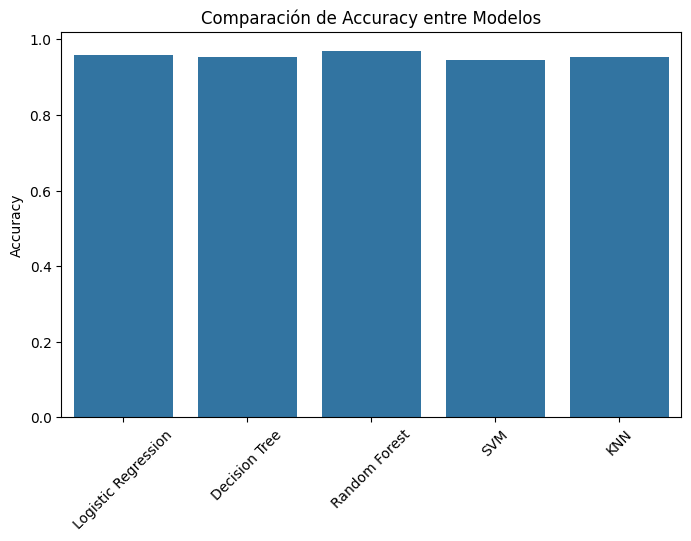

In [ ]:
# 7. Comparar accuracies entre modelos
# Gráfico de comparación de accuracy
plt.figure(figsize=(8, 5))
sns.barplot(x=list(resultados.keys()), y=list(resultados.values()))
plt.xticks(rotation=45)
plt.title("Comparación de Accuracy entre Modelos")
plt.ylabel("Accuracy")
plt.show()



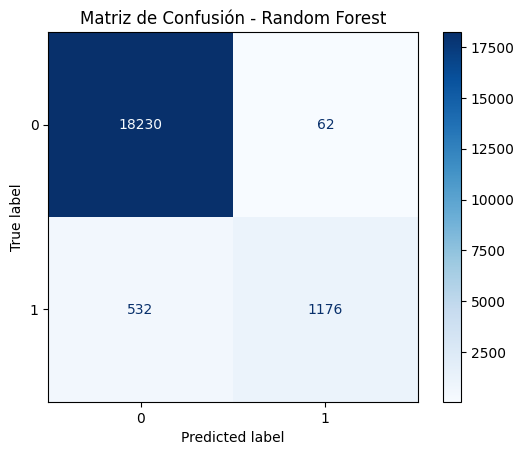

In [ ]:
# 8. Matriz de confusión del mejor modelo clásico

# Obtener el mejor modelo basado en accuracy
mejor_modelo = max(resultados, key=resultados.get)
modelo_final = modelos[mejor_modelo]
y_pred_final = modelo_final.predict(X_test)

# Mostrar matriz de confusión
cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_final.classes_)
disp.plot(cmap='Blues')
plt.title(f"Matriz de Confusión - {mejor_modelo}")
plt.show()

In [ ]:
#  9. Predicción nuevo paciente (modelo clásico)

# Nuevo paciente con variables ya codificadas (dummy)
nuevo_paciente = pd.DataFrame([{
    'age': 80.0,
    'hypertension': 0,
    'heart_disease': 1,
    'bmi': 25.19,
    'HbA1c_level': 6.6,
    'blood_glucose_level': 140,
    'gender_Male': False,
    'gender_Other': False,
    'smoking_history_current': False,
    'smoking_history_ever': False,
    'smoking_history_former': False,
    'smoking_history_never': True,
    'smoking_history_not current': False
}])

# Predicción y probabilidad
prediccion = modelo_final.predict(nuevo_paciente)
probabilidad = modelo_final.predict_proba(nuevo_paciente)

print("\n🧪 Predicción para nuevo paciente:")
print("¿Tiene diabetes?:", "Sí" if prediccion[0] == 1 else "No")
print("Probabilidad de clase 0 (No):", round(probabilidad[0][0], 2))
print("Probabilidad de clase 1 (Sí):", round(probabilidad[0][1], 2))


🧪 Predicción para nuevo paciente:
¿Tiene diabetes?: No
Probabilidad de clase 0 (No): 0.94
Probabilidad de clase 1 (Sí): 0.06


In [ ]:
# 10. Predicción nuevo paciente (AutoML - modelo específico con nuevo paciente)

# Nuevo paciente diferente
nuevo_paciente2 = pd.DataFrame([{
    'age': 55.0,
    'hypertension': 1,
    'heart_disease': 0,
    'bmi': 33.2,
    'HbA1c_level': 7.8,
    'blood_glucose_level': 190,
    'gender_Male': True,
    'gender_Other': False,
    'smoking_history_current': True,
    'smoking_history_ever': False,
    'smoking_history_former': False,
    'smoking_history_never': False,
    'smoking_history_not current': False
}])

# Convertir a H2OFrame
nuevo_paciente2_h2o = h2o.H2OFrame(nuevo_paciente2)

# Obtener el modelo H2O específico si aún no lo has cargado
modelo_h2o_especifico = h2o.get_model('StackedEnsemble_BestOfFamily_1_AutoML_1_20250605_14748')

# Hacer predicción
prediccion_h2o_2 = modelo_h2o_especifico.predict(nuevo_paciente2_h2o)

# Resultados
pred_clase2 = prediccion_h2o_2.as_data_frame().iloc[0, 0]
prob_no2 = prediccion_h2o_2.as_data_frame().iloc[0, 1]
prob_si2 = prediccion_h2o_2.as_data_frame().iloc[0, 2]

print("\n🧪 Predicción para NUEVO paciente con modelo H2O:")
print(f"¿Tiene diabetes?: {'Sí' if pred_clase2 == '1' else 'No'}")
print(f"Probabilidad de clase 0 (No): {round(prob_no2, 2)}")
print(f"Probabilidad de clase 1 (Sí): {round(prob_si2, 2)}")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%

🧪 Predicción para NUEVO paciente con modelo H2O:
¿Tiene diabetes?: No
Probabilidad de clase 0 (No): 0.04
Probabilidad de clase 1 (Sí): 0.96


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow a